This notebook will examine the effectiveness of training a Radial Basis Function (RBF) network for a binary classification task on a two-dimensional dataset with 500 instances.

First we must load the dataset:

In [1]:
library("corpcor")
circle<-read.table("circle.txt",sep=",",header=T)
circle


V1,V2,labels
-0.36125433,0.77676658,1
0.35104327,-0.83239241,1
-0.35627285,0.92975989,1
-0.03069027,-0.18070132,-1
0.94496021,0.97921835,1
-0.70625080,-0.99694213,1
0.99161877,0.99690349,1
0.83584269,0.30713464,1
-0.17736194,0.90564358,1
-0.17756695,0.37130143,-1


Next we visualize the dataset:

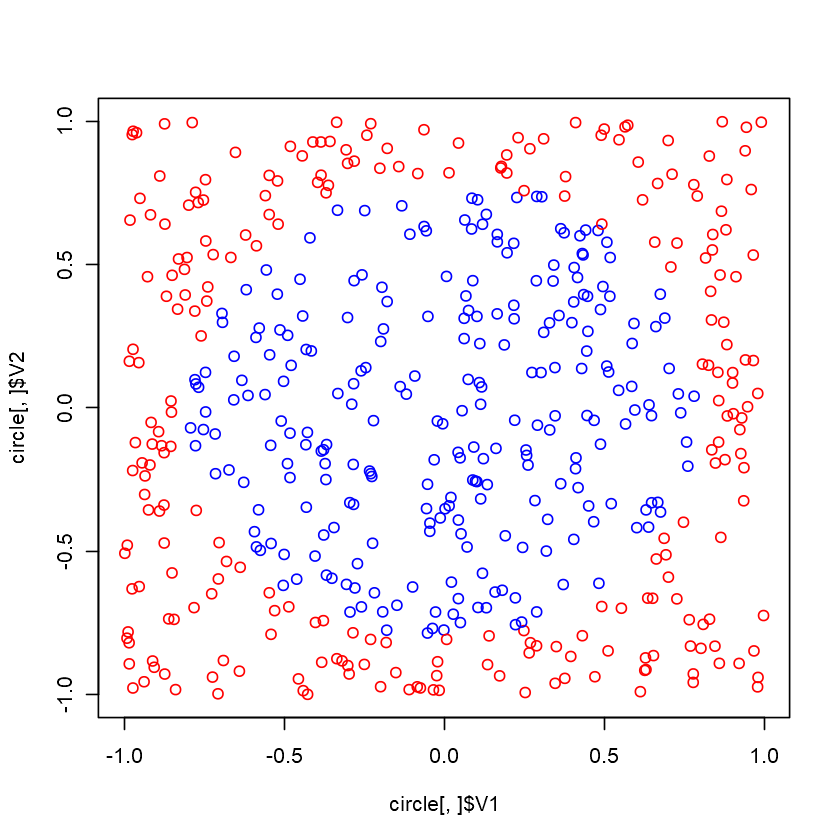

In [2]:
class.index<-dim(circle)[2]
plot(circle[,]$V1,circle[,]$V2,xlim=c(-1,1),ylim=c(-1,1),col=c("blue","black","red")[circle[,]$labels+2])

Next we perform a 70-30 train/test split:

In [3]:
train.index<-sample(nrow(circle),nrow(circle)*0.3)
train.index

[1] 459 354  13 482 116 136 316 213 224 451 467 360 267 193 284 137 328  53
 [19] 182 321 293 118 106 286 162 473 203 130 313 307 143 234 361 222  20 109
 [37] 289 488 493 161 351 231 465 400 469 122 228 425  31 475 241 315 325 412
 [55]  89 139 445 190 107 128 129 363  40 288 382 146 218 246 249 368 110 344
 [73] 205 366 420 287  86 399 320 463 113 336 210 499 219 103  72 370 387 214
 [91] 461  14 491 441 173   9 314 101 403 145 436 230 279 135  29 453 407 108
[109]  92 317 304 275 494 281  27 142 409 414 381 244 259 364  12 232  17 339
[127]  73 376 202 401  97 483 127 415  81 377 212 338 245 326 112 337 318 120
[145] 324 367 402  33 330 183

In [4]:
training.set<-circle[train.index,]
training.set

,V1,V2,labels
459,-0.953707702,0.158214991,1
354,0.377162058,0.739209653,1
13,0.045367011,0.924229216,1
482,0.008213195,-0.807247063,1
116,0.878132381,-0.180204436,1
136,0.227569337,0.734268232,-1
316,-0.300581376,-0.898516963,1
213,0.512752345,-0.847260452,1
224,0.159647269,-0.642042277,-1
451,-0.334873488,-0.874592004,1


In [5]:
training.set.features<-training.set[,-class.index]
training.set.labels<-training.set[,class.index]
training.set.labels

[1]  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1
 [26] -1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1
 [51]  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1
 [76] -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1
[101] -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1
[126]  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1  1

In [6]:
test.set<-circle[-train.index,]
test.set

,V1,V2,labels
1,-0.36125433,0.77676658,1
2,0.35104327,-0.83239241,1
3,-0.35627285,0.92975989,1
4,-0.03069027,-0.18070132,-1
5,0.94496021,0.97921835,1
6,-0.70625080,-0.99694213,1
7,0.99161877,0.99690349,1
8,0.83584269,0.30713464,1
10,-0.17756695,0.37130143,-1
11,0.76197443,-0.20293592,-1


In [7]:
test.set.features<-test.set[,-class.index]
test.set.labels<-test.set[,class.index]
test.set.labels

[1]  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1
 [26]  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1
 [51]  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1
 [76] -1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
[101]  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1
[126] -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1  1  1
[151] -1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1
[176]  1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1
[201]  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1
[226] -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1
[251] -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1  1
[276]  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1
[301] -1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1
[326] -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1

Next we provide a function to train the RBF network and execute the training. We will train an RBF model with 2 centers, 5 centers, and 10 centers, respectively.

In [8]:
rbf <- function(X, Y, K, gamma=1.0) {
  N<- dim(X)[1] # number of instances
  
  repeat {
    km <- kmeans(X, K)  # let's cluster K centers out of the dataset
    if (min(km$size)>0) # only accept if there are no empty clusters
      break
  }
  mus <- km$centers # the clusters points
  
  Phi <- matrix(rep(NA,(K+1)*N), ncol=K+1)
  for (lin in 1:N) {
    Phi[lin,1] <- 1    # bias column
    for (col in 1:K) {
      Phi[lin,col+1] <- exp( -gamma * norm(as.matrix(X[lin,]-mus[col,]),"F")^2 )
    }
  }
#  w <- pseudoinverse(t(Phi) %*% Phi) %*% t(Phi) %*% matrix(as.numeric(Y))  # find RBF weights
  w <- pseudoinverse(Phi) %*% matrix(as.numeric(Y))  # find RBF weights
  list(weights=w, centers=mus, gamma=gamma)  # return the rbf model
}
# now call rbf function
rbf.model.2<-rbf(training.set.features,training.set.labels, 2)
rbf.model.2

$weights
          [,1]
[1,]  2.623843
[2,] -2.386206
[3,] -3.022563

$centers
           V1         V2
1 -0.11450799 -0.5841307
2  0.08854528  0.4610525

$gamma
[1] 1

In [9]:
rbf.model.5<-rbf(training.set.features,training.set.labels, 5)
rbf.model.5

$weights
          [,1]
[1,]  3.999352
[2,] -2.826701
[3,] -2.080293
[4,] -1.608306
[5,] -1.024512
[6,] -2.039939

$centers
           V1         V2
1  0.46514543  0.3614045
2 -0.61532480 -0.3645666
3  0.67132315 -0.6182762
4 -0.07719623 -0.7495990
5 -0.52348814  0.6689460

$gamma
[1] 1

In [10]:
rbf.model.10<-rbf(training.set.features,training.set.labels, 10)
rbf.model.10

5.799698
-5.908817
-4.114527
-5.153639
-2.546680
2.967465
2.361171
-7.380517
5.551373
-6.357244
4.031228


Next we provide a function to make predictions using our trained models:

In [11]:
rbf.predict <- function(model, X, classification=FALSE) {  
  gamma   <- model$gamma
  centers <- model$centers
  w       <- model$weights
  N       <- dim(X)[1]    # number of observations
  
  pred <- rep(w[1],N)  # we need to init to a value, so let's start with the bias
  for (j in 1:N) {  
    # find prediction for point xj
    for (k in 1:length(centers[,1])) {
      # the weight for center[k] is given by w[k+1] (because w[1] is the bias)
      pred[j] <- pred[j] + w[k+1] * exp( -gamma * norm(as.matrix(X[j,]-centers[k,]),"F")^2 )
    }
  }
  
  if (classification) {
    pred <- unlist(lapply(pred, sign))
  }
  return(pred)
}
predictions.2<-rbf.predict(rbf.model.2,test.set.features,TRUE)
predictions.2

[1]  1  1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1
 [26] -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1
 [51]  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1
 [76] -1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
[101]  1 -1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1
[126] -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1  1  1
[151] -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1
[176]  1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1 -1  1 -1
[201]  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1
[226]  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1  1  1 -1  1
[251] -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1
[276]  1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1
[301] -1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
[326] -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1  1  1  1  1

In [12]:
predictions.5<-rbf.predict(rbf.model.5,test.set.features,TRUE)
predictions.5

[1]  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1
 [26]  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1
 [51]  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1
 [76] -1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
[101]  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1
[126] -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1
[151] -1  1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1
[176]  1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1
[201]  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1
[226] -1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1
[251] -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1
[276]  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1
[301] -1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1
[326] -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1

In [13]:
predictions.10<-rbf.predict(rbf.model.10,test.set.features,TRUE)
predictions.10

[1]  1  1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1
 [26]  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1
 [51]  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1  1 -1 -1
 [76] -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
[101]  1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1
[126] -1 -1  1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1  1  1
[151] -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1
[176]  1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1
[201]  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1
[226] -1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1
[251] -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1  1
[276]  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1
[301] -1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1
[326] -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1

Next we present the confusion matrices to validate the predictions:

In [14]:
cm.2<-table(test.set.labels,predictions.2)
cm.2

               predictions.2
test.set.labels  -1   1
             -1 155  22
             1   18 155

In [15]:
cm.5<-table(test.set.labels,predictions.5)
cm.5

               predictions.5
test.set.labels  -1   1
             -1 172   5
             1    1 172

In [16]:
cm.10<-table(test.set.labels,predictions.10)
cm.10

               predictions.10
test.set.labels  -1   1
             -1 163  14
             1    5 168

In [17]:
acc.2<-(cm.2[1][1]+cm.2[4][1])/sum(cm.2)
caption.2<-sprintf("RBF Accuracy: %.4f",acc.2)
caption.2

[1] "RBF Accuracy: 0.8857"

In [18]:
acc.5<-(cm.5[1][1]+cm.5[4][1])/sum(cm.5)
caption.5<-sprintf("RBF Accuracy: %.4f",acc.5)
caption.5

[1] "RBF Accuracy: 0.9829"

In [19]:
acc.10<-(cm.10[1][1]+cm.10[4][1])/sum(cm.10)
caption.10<-sprintf("RBF Accuracy: %.4f",acc.10)
caption.10

[1] "RBF Accuracy: 0.9457"

Next we visualize the predictions with the RBF centers:

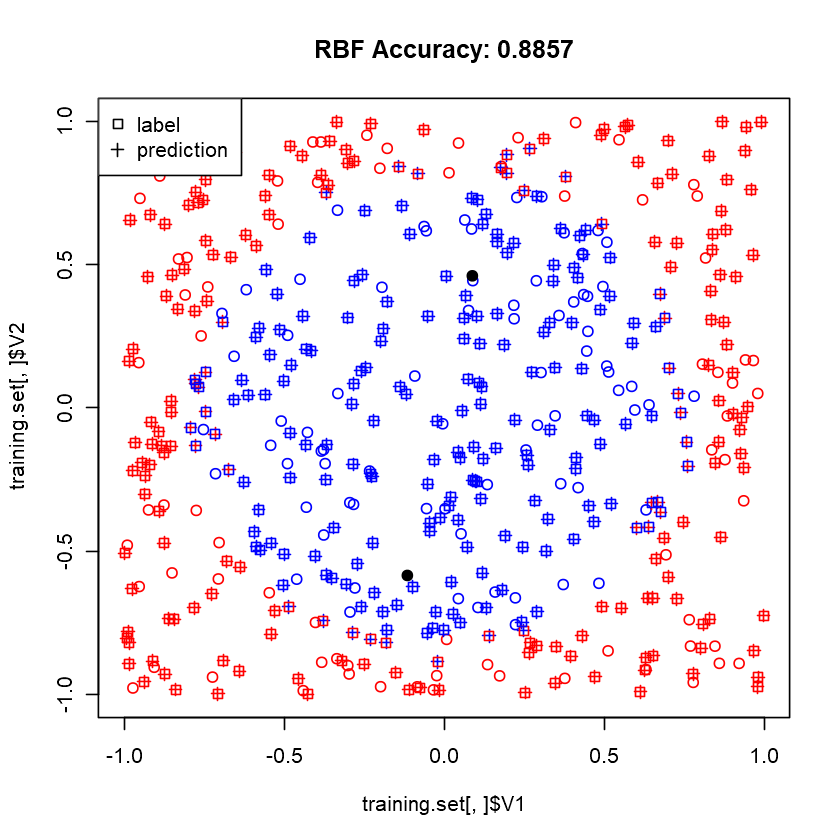

In [20]:
plot(training.set[,]$V1,training.set[,]$V2,xlim=c(-1,1),ylim=c(-1,1),col=c("blue","black","red")[training.set.labels[]+2])
points(test.set[,1],test.set[,2],col=c("blue","black","red")[predictions.2[]+2],pch=3)
points(test.set[,1],test.set[,2],col=c("blue","black","red")[test.set.labels[]+2],pch=0)
points(rbf.model.2$centers, col="black", pch=19) 
legend("topleft",legend=c("label","prediction"),pch=c(0,3))
title(caption.2)

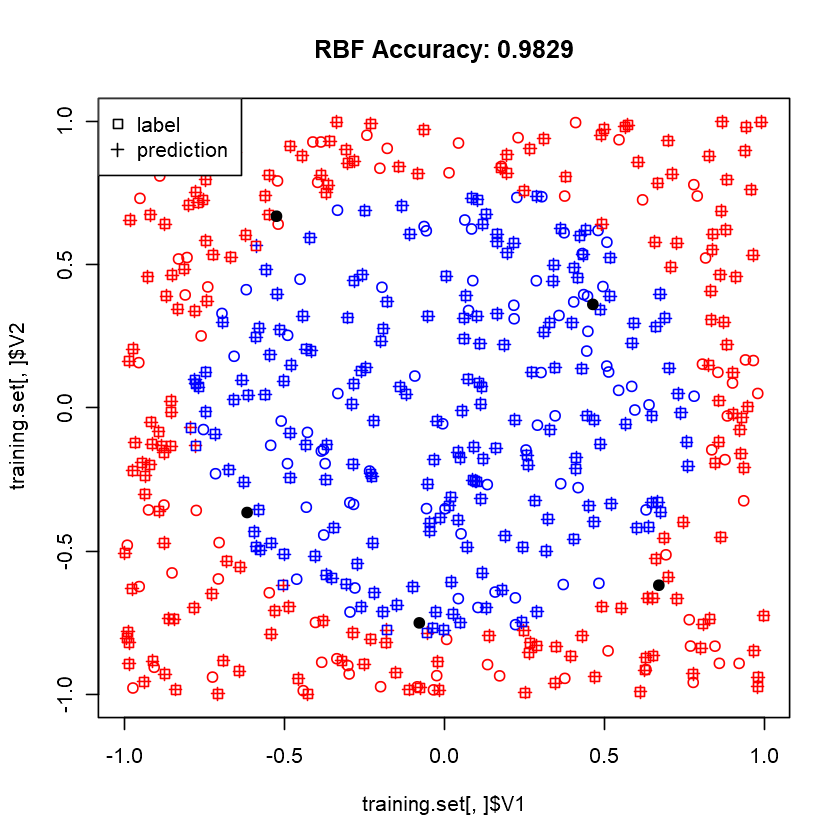

In [21]:
plot(training.set[,]$V1,training.set[,]$V2,xlim=c(-1,1),ylim=c(-1,1),col=c("blue","black","red")[training.set.labels[]+2])
points(test.set[,1],test.set[,2],col=c("blue","black","red")[predictions.5[]+2],pch=3)
points(test.set[,1],test.set[,2],col=c("blue","black","red")[test.set.labels[]+2],pch=0)
points(rbf.model.5$centers, col="black", pch=19) 
legend("topleft",legend=c("label","prediction"),pch=c(0,3))
title(caption.5)

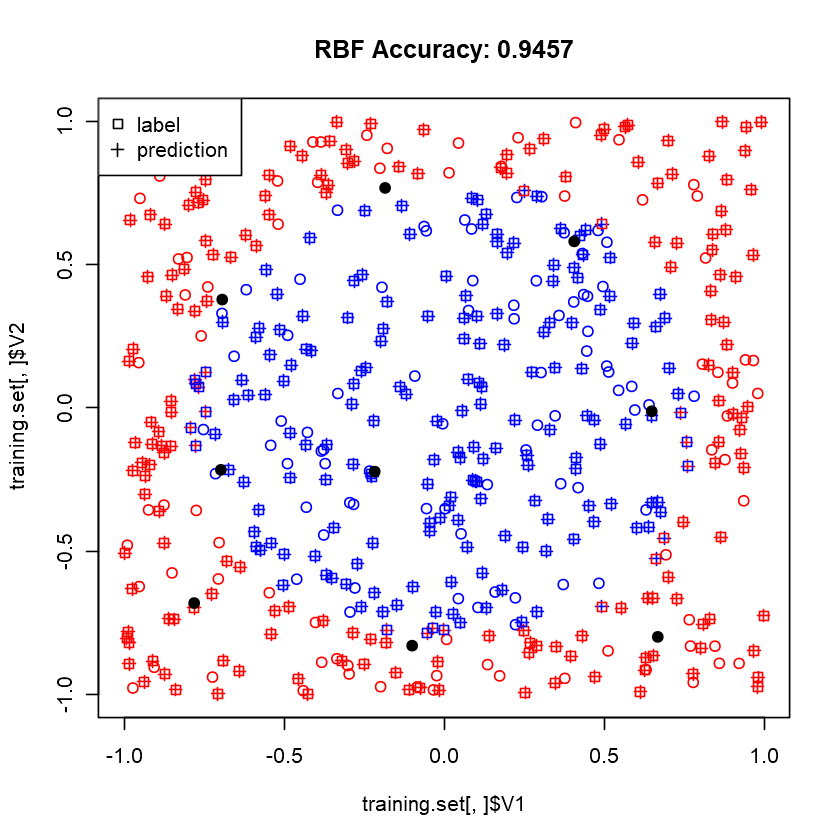

In [22]:
plot(training.set[,]$V1,training.set[,]$V2,xlim=c(-1,1),ylim=c(-1,1),col=c("blue","black","red")[training.set.labels[]+2])
points(test.set[,1],test.set[,2],col=c("blue","black","red")[predictions.10[]+2],pch=3)
points(test.set[,1],test.set[,2],col=c("blue","black","red")[test.set.labels[]+2],pch=0)
points(rbf.model.10$centers, col="black", pch=19) 
legend("topleft",legend=c("label","prediction"),pch=c(0,3))
title(caption.10)

Next we compare the performance of an RBF network with 2 centers, 5 centers, and 10 centers to the performance of a neural network with 1 hidden layer containing 2 hidden nodes, 5 hidden nodes, and 10 hidden nodes, respectively. We perform the same process with the neural network as we did with the RBF network:

In [23]:
library(neuralnet)
nrepeats<-5
net.2<-neuralnet(labels ~ V1+V2,training.set,hidden=2,rep=nrepeats)
summary(net.2)

                    Length Class      Mode    
call                  5    -none-     call    
response            150    -none-     numeric 
covariate           300    -none-     numeric 
model.list            2    -none-     list    
err.fct               1    -none-     function
act.fct               1    -none-     function
linear.output         1    -none-     logical 
data                  3    data.frame list    
exclude               0    -none-     NULL    
net.result            5    -none-     list    
weights               5    -none-     list    
generalized.weights   5    -none-     list    
startweights          5    -none-     list    
result.matrix        60    -none-     numeric 

In [24]:
net.5<-neuralnet(labels ~ V1+V2,training.set,hidden=5,rep=nrepeats)
summary(net.5)

                    Length Class      Mode    
call                  5    -none-     call    
response            150    -none-     numeric 
covariate           300    -none-     numeric 
model.list            2    -none-     list    
err.fct               1    -none-     function
act.fct               1    -none-     function
linear.output         1    -none-     logical 
data                  3    data.frame list    
exclude               0    -none-     NULL    
net.result            5    -none-     list    
weights               5    -none-     list    
generalized.weights   5    -none-     list    
startweights          5    -none-     list    
result.matrix       120    -none-     numeric 

In [25]:
net.10<-neuralnet(labels ~ V1+V2,training.set,hidden=10,rep=nrepeats)
summary(net.10)

                    Length Class      Mode    
call                  5    -none-     call    
response            150    -none-     numeric 
covariate           300    -none-     numeric 
model.list            2    -none-     list    
err.fct               1    -none-     function
act.fct               1    -none-     function
linear.output         1    -none-     logical 
data                  3    data.frame list    
exclude               0    -none-     NULL    
net.result            5    -none-     list    
weights               5    -none-     list    
generalized.weights   5    -none-     list    
startweights          5    -none-     list    
result.matrix       220    -none-     numeric 

In [26]:
nn.predictions.2<-predict(net.2,test.set[,-3])
nn.predictions.2<-ifelse(nn.predictions.2>0.5,1,-1)
nn.predictions.2

1,-1
2,1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
10,-1
11,-1
15,-1


In [27]:
nn.predictions.5<-predict(net.5,test.set[,-3])
nn.predictions.5<-ifelse(nn.predictions.5>0.5,1,-1)
nn.predictions.5

1,1
2,-1
3,1
4,-1
5,1
6,1
7,1
8,1
10,-1
11,-1
15,-1


In [28]:
nn.predictions.10<-predict(net.10,test.set[,-3])
nn.predictions.10<-ifelse(nn.predictions.10>0.5,1,-1)
nn.predictions.10

1,-1
2,-1
3,1
4,-1
5,1
6,1
7,1
8,1
10,-1
11,-1
15,-1


In [29]:
nn.cm.2<-table(test.set.labels,nn.predictions.2)
nn.cm.2

               nn.predictions.2
test.set.labels  -1   1
             -1 168   9
             1   90  83

In [30]:
nn.cm.5<-table(test.set.labels,nn.predictions.5)
nn.cm.5

               nn.predictions.5
test.set.labels  -1   1
             -1 176   1
             1   51 122

In [31]:
nn.cm.10<-table(test.set.labels,nn.predictions.10)
nn.cm.10

               nn.predictions.10
test.set.labels  -1   1
             -1 177   0
             1   40 133

In [32]:
nn.acc.2<-(nn.cm.2[1][1]+nn.cm.2[4][1])/sum(nn.cm.2)
nn.caption.2<-sprintf("One Hidden Layer (%d nodes) NN Accuracy: %.4f",2,nn.acc.2)
nn.caption.2

[1] "One Hidden Layer (2 nodes) NN Accuracy: 0.7171"

In [33]:
nn.acc.5<-(nn.cm.5[1][1]+nn.cm.5[4][1])/sum(nn.cm.5)
nn.caption.5<-sprintf("One Hidden Layer (%d nodes) NN Accuracy: %.4f",5,nn.acc.5)
nn.caption.5

[1] "One Hidden Layer (5 nodes) NN Accuracy: 0.8514"

In [34]:
nn.acc.10<-(nn.cm.10[1][1]+nn.cm.10[4][1])/sum(nn.cm.10)
nn.caption.10<-sprintf("One Hidden Layer (%d nodes) NN Accuracy: %.4f",10,nn.acc.10)
nn.caption.10

[1] "One Hidden Layer (10 nodes) NN Accuracy: 0.8857"

Finally we compare the performance of the two network types:

In [35]:
rbf.accuracy.vector<-c(acc.2, acc.5, acc.10)
nn.accuracy.vector<-c(nn.acc.2, nn.acc.5, nn.acc.10)
cenhid.vector<-c(2, 5, 10)
accuracy.comp.frame<-as.data.frame(cbind(rbf.accuracy.vector, nn.accuracy.vector, cenhid.vector))
names(accuracy.comp.frame)<-c("RBF Accuracy", "NN Accuracy", "Centers/Hidden Nodes")
accuracy.comp.frame

RBF Accuracy,NN Accuracy,Centers/Hidden Nodes
0.8857143,0.7171429,2
0.9828571,0.8514286,5
0.9457143,0.8857143,10


It is evident from these results that the RBF network performs much better on this datset than a Neural Network with one hidden layer. Also, it took much more time to train the Neural Network than it did the RBF network. The best overall performance was obtained with an RBF network with 5 centers.